In [1]:
from ultralytics import YOLO
import numpy as np

/Users/theorousseaux/Documents/Hackathon/FitnessEquation/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
id_joints_dict = {0: 'nose',
        1: 'left_eye',
        2: 'right_eye',
        3: 'left_ear',
        4: 'right_ear',
        5: 'left_shoulder',
        6: 'right_shoulder',
        7: 'left_elbow',
        8: 'right_elbow',
        9: 'left_wrist',
        10: 'right_wrist',
        11: 'left_hip',
        12: 'right_hip',
        13: 'left_knee',
        14: 'right_knee',
        15: 'left_ankle',
        16: 'right_ankle'}
joints_id_dict = {v: k for k, v in id_joints_dict.items()}

In [20]:
import os
import json

model = YOLO('yolov8n-pose.pt')

def get_keypoints_from_keypoints(video_path):
    save_folder='tmp'
    os.makedirs(save_folder, exist_ok=True)
    keypoints = []
    results = model(video_path, save=True, show_conf=False, show_boxes=False)
    for (i, frame) in enumerate(results):
        frame_dict = {}
        frame_dict['frame'] = i
        frame_dict['keypoints'] = frame.keypoints.xy[0].tolist()
        keypoints.append(frame_dict)

    file_path = os.path.join(save_folder, 'keypoints.json')
    with open(file_path, 'w') as f:
        json.dump(keypoints, f)
    return file_path

In [21]:
file_path = get_keypoints_from_keypoints('../../data/pose/squat.mp4')



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 person, 230.4ms
video 1/1 (frame 2/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 person, 263.6ms
video 1/1 (frame 3/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 p

In [23]:
def calculate_angle(a, b, c):

    """
    Calculates the angle between three joints.

    Args:
        a (tuple): coordinates of the first joint
        b (tuple): coordinates of the second joint
        c (tuple): coordinates of the third joint

    Returns:
        angle (float): angle between the three joints
    """
    
    ba = np.array(a) - np.array(b)
    bc = np.array(c) - np.array(b)

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

def compute_left_knee_angle(keypoints):

    """
    Computes the knee angle.

    Args:
        keypoints (list): list of keypoints

    Returns:
        knee_angle (float): knee angle
    """

    left_hip = keypoints[joints_id_dict['left_hip']]
    left_knee = keypoints[joints_id_dict['left_knee']]
    left_ankle = keypoints[joints_id_dict['left_ankle']]

    knee_angle = calculate_angle(left_hip, left_knee, left_ankle)

    return knee_angle

def compute_right_knee_angle(keypoints):
    
        """
        Computes the knee angle.
    
        Args:
            keypoints (list): list of keypoints
    
        Returns:
            knee_angle (float): knee angle
        """
    
        right_hip = keypoints[joints_id_dict['right_hip']]
        right_knee = keypoints[joints_id_dict['right_knee']]
        right_ankle = keypoints[joints_id_dict['right_ankle']]
    
        knee_angle = calculate_angle(right_hip, right_knee, right_ankle)
    
        return knee_angle   

def moving_average(data, window_size):

    """
    Computes the moving average of a list.

    Args:
        data (list): list of values
        window_size (int): size of the window

    Returns:
        avg (list): list of moving average values
    """

    avg = []
    for i in range(len(data) - window_size + 1):
        avg.append(sum(data[i:i + window_size]) / window_size)

    return avg

In [25]:
def compute_right_knee_angle_list(json_path: str):
    keypoints_list = json.load(open(json_path))
    right_knee_angle_list = []
    for keypoints in keypoints_list:
        right_knee_angle = compute_right_knee_angle(keypoints['keypoints'])
        right_knee_angle_list.append(right_knee_angle)
    return moving_average(right_knee_angle_list, 10)

compute_right_knee_angle_list(file_path)

[166.86948323445398,
 166.8841659671558,
 166.89243964490635,
 166.89759766904126,
 166.89664163184258,
 166.9030714891749,
 166.90583181272711,
 166.9052865913186,
 166.90429725989497,
 166.90391830442985,
 166.9021203739705,
 166.90134969961954,
 166.9015497550319,
 166.90332061203497,
 166.9017919789185,
 166.90078366101983,
 166.90129921693529,
 166.90182765564404,
 166.9005366310771,
 166.89838608408564,
 166.8977663040462,
 166.89319904933978,
 166.88382332910516,
 166.87587096214855,
 166.8683282986173,
 166.97604672661197,
 167.0730517120081,
 167.18113542921648,
 167.30122453139967,
 167.4138700025592,
 167.29505655976004,
 167.1737958056854,
 167.0599211213337,
 166.89407673527785,
 166.72746683293673,
 166.44028988155634,
 165.84631854733718,
 164.87497185994886,
 163.89533811841477,
 162.9201084650834,
 161.9902869903691,
 161.06332647746888,
 159.89516457030768,
 158.77983346447735,
 157.66129645495508,
 155.93208453293258,
 154.5247472243725,
 153.1959085875595,
 151.8544

In [6]:
angles = []

for i in range(len(keypoints)):
    angles.append(compute_left_knee_angle(keypoints[i]))

angles = moving_average(angles, 10)

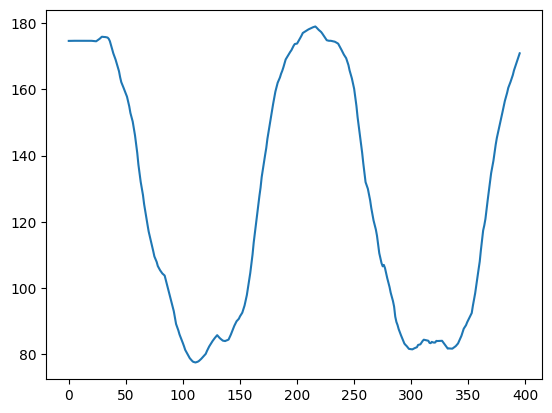

In [7]:
import matplotlib.pyplot as plt

os.makedirs('fig', exist_ok=True)
plt.plot(angles)
plt.xlabel('Frame')
plt.ylabel('Knee Angle')
plt.title('Evolution of the knee angle')
plt.savefig('fig/knee_angle.png')

In [8]:
from langchain_core.messages import HumanMessage
from langchain_mistralai.chat_models import ChatMistralAI

# If api_key is not passed, default behavior is to use the `MISTRAL_API_KEY` environment variable.
llm = ChatMistralAI(model='mistral-large-latest', api_key="i5jSJkCFNGKfgIztloxTMjfckiFbYBj4")
messages = [HumanMessage(content="knock knock")]
llm.invoke(messages)

AIMessage(content="Who's there?\n\n(Please provide the next line of the knock-knock joke.)", response_metadata={'token_usage': {'prompt_tokens': 5, 'total_tokens': 26, 'completion_tokens': 21}, 'model': 'mistral-large-latest', 'finish_reason': 'stop'}, id='run-f72f8b00-6073-439e-9b82-cc50101f0809-0')

In [83]:
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import tool

@tool
def compute_right_knee_angle(pose: list) -> float:

    """
    Computes the knee angle.

    Args:
        pose (list): list of keypoints

    Returns:
        knee_angle (float): knee angle
    """

    right_hip = pose[joints_id_dict['right_hip']]
    right_knee = pose[joints_id_dict['right_knee']]
    right_ankle = pose[joints_id_dict['right_ankle']]

    knee_angle = calculate_angle(right_hip, right_knee, right_ankle)

    print(knee_angle)

    return str(knee_angle)

@tool
def get_keypoints_from_path(video_path: str):
    """
    Get keypoints from a video.

    Args:
        video_path (str): path to the video
        model (YOLO): model to use

    Returns:
        keypoints (list): list of keypoints
    """

    keypoints = []
    results = model(video_path, save=True, show_conf=False, show_boxes=False)
    for frame in results:
        tensor = frame.keypoints.xy[0]
        keypoints.append(tensor.tolist())

    return keypoints

In [84]:
sequence = get_keypoints_from_path('../../data/pose/squat.mp4')



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 person, 140.3ms
video 1/1 (frame 2/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 person, 160.4ms
video 1/1 (frame 3/465) /Users/theorousseaux/Documents/Hackathon/FitnessEquation/Modules/PoseEstimation/../../data/pose/squat.mp4: 640x576 1 p

In [46]:
print(compute_right_knee_angle.name)
print(compute_right_knee_angle.description)
print(compute_right_knee_angle.args)
print(compute_right_knee_angle.return_direct)

compute_right_knee_angle
compute_right_knee_angle(pose: list) -> float - Computes the knee angle.

    Args:
        pose (list): list of keypoints

    Returns:
        knee_angle (float): knee angle
{'pose': {'title': 'Pose', 'type': 'array', 'items': {}}}
False


In [85]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate

tools = [compute_right_knee_angle]

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Make sure to use the compute_right_knee_angle tool for information.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

# Construct the Tools agent
agent = create_tool_calling_agent(llm, tools, prompt)

In [91]:
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input": f"Compute my knee angle at the beginning: {sequence[0]}"})



> Entering new AgentExecutor chain...

Invoking: `compute_right_knee_angle` with `{'pose': [[705.0933227539062, 159.55224609375], [0.0, 0.0], [688.4795532226562, 135.9303436279297], [0.0, 0.0], [628.56689453125, 150.44094848632812], [603.4036254882812, 295.99420166015625], [619.6266479492188, 305.51202392578125], [0.0, 0.0], [629.2274780273438, 532.8370361328125], [0.0, 0.0], [665.978515625, 716.4405517578125], [634.9310302734375, 684.9545288085938], [642.503173828125, 691.6080932617188], [633.3930053710938, 1001.8157958984375], [649.4693603515625, 1014.472900390625], [601.3526611328125, 1321.026123046875], [580.6210327148438, 1337.936279296875]]}`


166.748027626137
166.748027626137The knee angle at the beginning is approximately 166.75 degrees.

> Finished chain.


{'input': 'Compute my knee angle at the beginning: [[705.0933227539062, 159.55224609375], [0.0, 0.0], [688.4795532226562, 135.9303436279297], [0.0, 0.0], [628.56689453125, 150.44094848632812], [603.4036254882812, 295.99420166015625], [619.6266479492188, 305.51202392578125], [0.0, 0.0], [629.2274780273438, 532.8370361328125], [0.0, 0.0], [665.978515625, 716.4405517578125], [634.9310302734375, 684.9545288085938], [642.503173828125, 691.6080932617188], [633.3930053710938, 1001.8157958984375], [649.4693603515625, 1014.472900390625], [601.3526611328125, 1321.026123046875], [580.6210327148438, 1337.936279296875]]',
 'output': 'The knee angle at the beginning is approximately 166.75 degrees.'}

In [49]:
from langchain import hub
from langchain.agents import AgentExecutor, create_json_chat_agent
from langchain_community.tools.tavily_search import TavilySearchResults


tools = [compute_right_knee_angle]

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/react-chat-json")

# Construct the JSON agent
agent = create_json_chat_agent(llm, tools, prompt)

In [50]:
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=False
)

In [51]:
agent_executor.invoke({"input": f"Hi, is my squat correct ? {keypoints}"})

Parameter `stop` not yet supported (https://docs.mistral.ai/api)




> Entering new AgentExecutor chain...


SSEError: Expected response header Content-Type to contain 'text/event-stream', got 'application/json'

In [44]:
input_=f"Is my squat correct? {keypoints}"
agent_executor.invoke({"input": input_})

Parameter `stop` not yet supported (https://docs.mistral.ai/api)




> Entering new AgentExecutor chain...


SSEError: Expected response header Content-Type to contain 'text/event-stream', got 'application/json'